<a href="https://colab.research.google.com/github/Lokeshpalwai/SkinCancerDetection/blob/master/PH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/skin cancer1/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/skin cancer1/Test")


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

0
0


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

NotFoundError: Could not find directory /content/drive/MyDrive/skin cancer1/Train

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

NotFoundError: Could not find directory /content/drive/MyDrive/skin cancer1/Train

In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

NameError: name 'train_ds' is not defined

<Figure size 1000x1000 with 0 Axes>

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 9 # As target class has 9 labels

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 1480s 3s/step - loss: 1.8641 - accuracy: 0.2910 - val_loss: 1.5966 - val_accuracy: 0.3667
Epoch 2/20
169/169 [==============================] - 167s 988ms/step - loss: 1.3564 - accuracy: 0.4974 - val_loss: 1.2690 - val_accuracy: 0.5271
Epoch 3/20
169/169 [==============================] - 163s 966ms/step - loss: 1.1379 - accuracy: 0.5825 - val_loss: 1.1266 - val_accuracy: 0.5969
Epoch 4/20
169/169 [==============================] - 165s 973ms/step - loss: 0.9763 - accuracy: 0.6402 - val_loss: 1.0108 - val_accuracy: 0.6206
Epoch 5/20
169/169 [==============================] - 165s 977ms/step - loss: 0.7952 - accuracy: 0.7131 - val_loss: 0.9678 - val_accuracy: 0.6518
Epoch 6/20
169/169 [==============================] - 165s 977ms/step - loss: 0.6527 - accuracy: 0.7637 - val_loss: 0.7953 - val_accuracy: 0.7157
Epoch 7/20
169/169 [==============================] - 166s 985ms/step - loss: 0.5599 - accuracy: 0.7986 - val_loss: 0.7083 - v

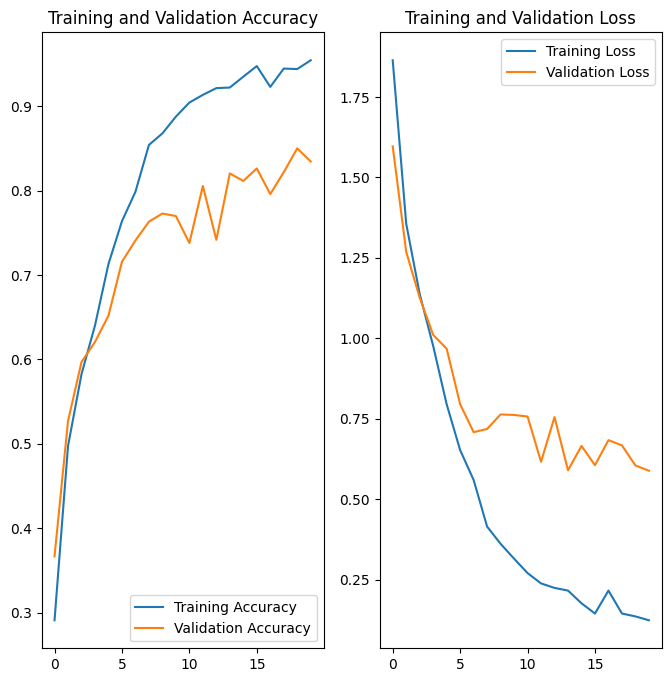

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])


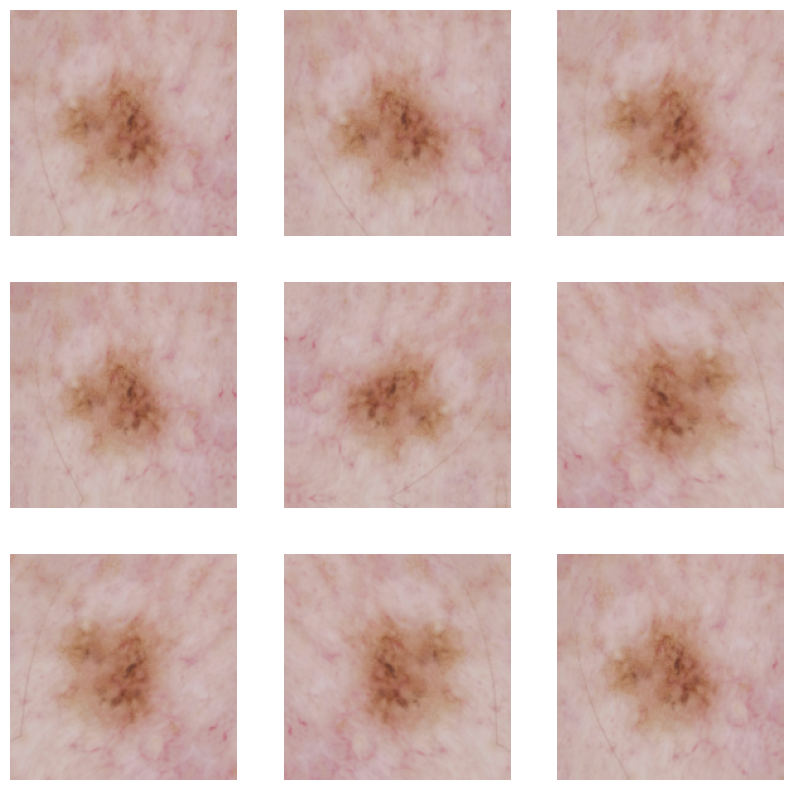

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 206s 1s/step - loss: 1.8899 - accuracy: 0.2663 - val_loss: 1.5761 - val_accuracy: 0.3905
Epoch 2/20
169/169 [==============================] - 200s 1s/step - loss: 1.5845 - accuracy: 0.3906 - val_loss: 1.5282 - val_accuracy: 0.4098
Epoch 3/20
169/169 [==============================] - 210s 1s/step - loss: 1.4297 - accuracy: 0.4599 - val_loss: 1.3834 - val_accuracy: 0.4655
Epoch 4/20
169/169 [==============================] - 201s 1s/step - loss: 1.3670 - accuracy: 0.4761 - val_loss: 1.2683 - val_accuracy: 0.5338
Epoch 5/20
169/169 [==============================] - 201s 1s/step - loss: 1.3067 - accuracy: 0.4998 - val_loss: 1.2771 - val_accuracy: 0.5212
Epoch 6/20
169/169 [==============================] - 198s 1s/step - loss: 1.2376 - accuracy: 0.5202 - val_loss: 1.2053 - val_accuracy: 0.5419
Epoch 7/20
169/169 [==============================] - 199s 1s/step - loss: 1.1905 - accuracy: 0.5469 - val_loss: 1.2228 - val_accuracy: 0.5189

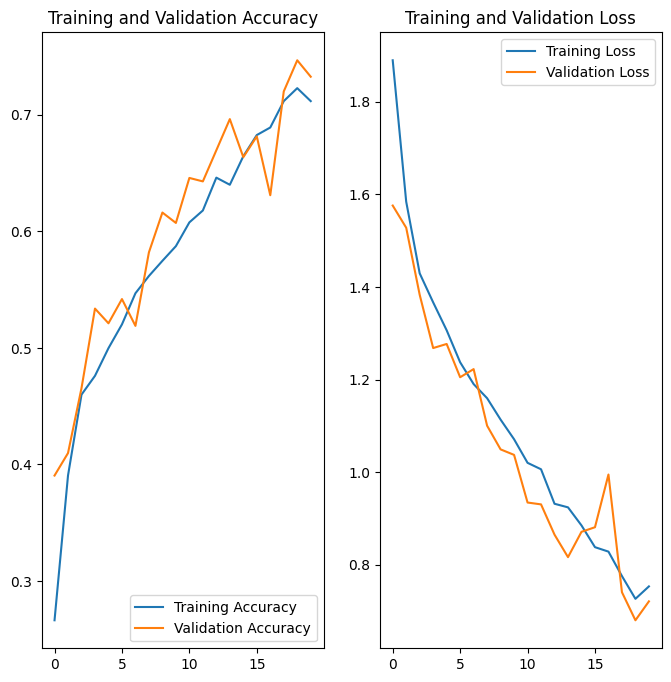

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [ ]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('/content/drive/MyDrive/skin cancer1/Train/pigmented benign keratosis/ISIC_0024435.jpg', 'pigmented benign keratosis'), ('/content/drive/MyDrive/skin cancer1/Train/pigmented benign keratosis/ISIC_0024709.jpg', 'pigmented benign keratosis')]


In [ ]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis
1,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis
2,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis
3,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis
4,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis


In [ ]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

In [ ]:
original_df[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
dtype: float64

In [ ]:
!pip install Augmentor

In [ ]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer1/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B1FB19FF760>: 100%|██████████| 500/500 [00:26<00:00, 19.07 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer1/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1FB1DD5C90>: 100%|██████████| 500/500 [00:25<00:00, 19.31 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer1/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1FB1BDE860>: 100%|██████████| 500/500 [00:26<00:00, 18.76 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer1/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B1FB82B55A0>: 100%|██████████| 500/500 [01:34<00:00,  5.29 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer1/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7B1FB982BD60>: 100%|██████████| 500/500 [01:33<00:00,  5.33 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer1/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1FB1A77D00>: 100%|██████████| 500/500 [00:19<00:00, 25.34 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer1/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B1FB1E047C0>: 100%|██████████| 500/500 [00:46<00:00, 10.70 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer1/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1FB1AA4CA0>: 100%|██████████| 500/500 [00:20<00:00, 24.56 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer1/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2037EAC970>: 100%|██████████| 500/500 [00:20<00:00, 24.30 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:2]

['/content/drive/MyDrive/skin cancer1/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025656.jpg_0b8eff90-c030-4850-b692-76a9874d7083.jpg',
 '/content/drive/MyDrive/skin cancer1/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028258.jpg_78e03dba-2925-4914-bc8b-01e5cb24cff2.jpg']

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:2]

['pigmented benign keratosis', 'pigmented benign keratosis']

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df.shape

<ipython-input-35-c1e5e8a551a2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


(11239, 2)

In [ ]:
new_df.head()

,Path,Label
0,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis
1,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis
2,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis
3,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis
4,/content/drive/MyDrive/skin cancer1/Train/pigm...,pigmented benign keratosis


In [ ]:
# Checking the class distribution after adding 500 samples per label
new_df['Label'].value_counts(normalize=True)

NameError: name 'new_df' is not defined

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 383s 1s/step - loss: 0.7805 - accuracy: 0.7037 - val_loss: 0.6985 - val_accuracy: 0.7361
Epoch 2/20
281/281 [==============================] - 392s 1s/step - loss: 0.7091 - accuracy: 0.7348 - val_loss: 0.7255 - val_accuracy: 0.7219
Epoch 3/20
281/281 [==============================] - 392s 1s/step - loss: 0.6800 - accuracy: 0.7430 - val_loss: 0.7897 - val_accuracy: 0.6974
Epoch 4/20
281/281 [==============================] - 389s 1s/step - loss: 0.6646 - accuracy: 0.7479 - val_loss: 0.6435 - val_accuracy: 0.7699
Epoch 5/20
281/281 [==============================] - 378s 1s/step - loss: 0.6169 - accuracy: 0.7676 - val_loss: 0.5942 - val_accuracy: 0.7837
Epoch 6/20
281/281 [==============================] - 388s 1s/step - loss: 0.5911 - accuracy: 0.7798 - val_loss: 0.5903 - val_accuracy: 0.7730
Epoch 7/20
281/281 [==============================] - 391s 1s/step - loss: 0.5612 - accuracy: 0.7876 - val_loss: 0.5314 - val_accuracy: 0.8122

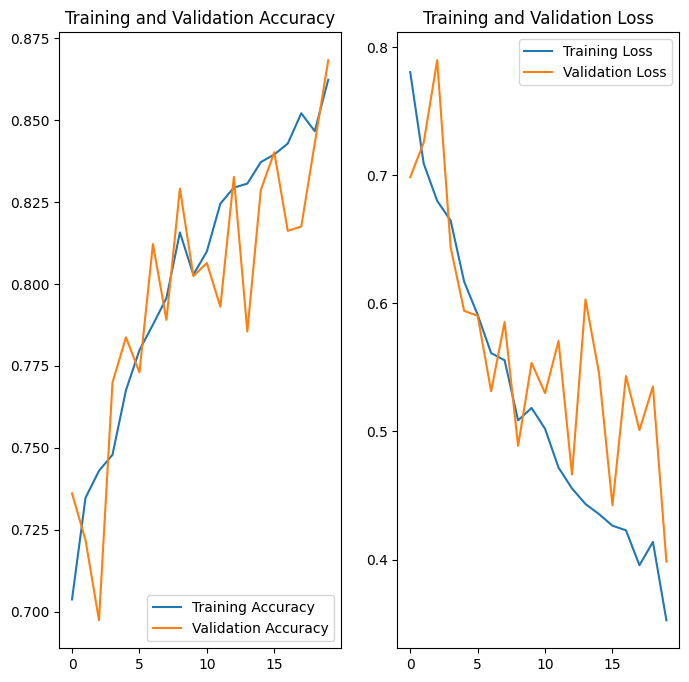

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()